### Note: This is a colab notebook. It's better to use google colab

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets.cifar10 import load_data as cif_load

In [2]:
(X_train, y_train), (X_test, y_test) = cif_load()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
## We scale pixel values to the range of [0-1]

X_train= X_train / 255.0
X_test = X_test / 255.0

In [5]:
## We one hot encode the labels (Transform form 1-10 to a binary vector)
y_train = pd.get_dummies(y_train.reshape(-1)).values
y_test = pd.get_dummies(y_test.reshape(-1)).values

In [8]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(32, 32, 3), padding="same", activation="relu"), ## 3x3 kernel with a stride of 1 and same padding
    Dropout(0.3),
    Conv2D(32, (3,3), padding="same", activation="relu"), ## 3x3 kernel with a stride of 1 and same padding
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation="relu"), ## ANN block
    Dropout(0.5), ## Dropout to avoid overfitting
    Dense(10, activation="softmax")
])
 
model.compile(optimizer="adam",
              loss="categorical_crossentropy", 
              metrics=["accuracy"])
model.summary() #display model's architecture
EsCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5) #We stop the training early if we end up stagnating

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[EsCallback], epochs=20, batch_size=64)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                      

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


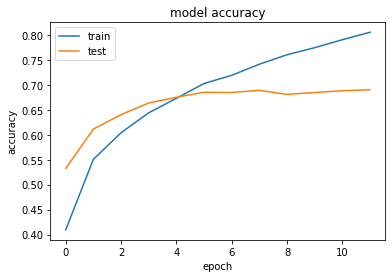

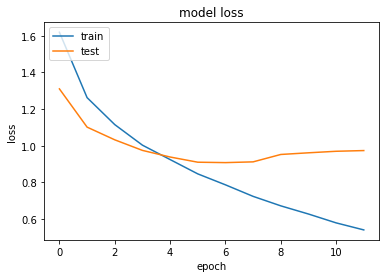

In [9]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
[loss,acc] = model.evaluate(X_test,y_test)
print("Accuracy is {} %".format(acc))
print("Loss is is {}".format(loss))

313/313 [==============================] - 2s 6ms/step - loss: 0.9740 - accuracy: 0.6900
Accuracy is 0.6899999976158142 %
Loss is is 0.9739875793457031
